In [1]:
from data import *
from tree import FaceTree
import time

Number of images:  2140
Number of training images:  1498
Number of test images:  642


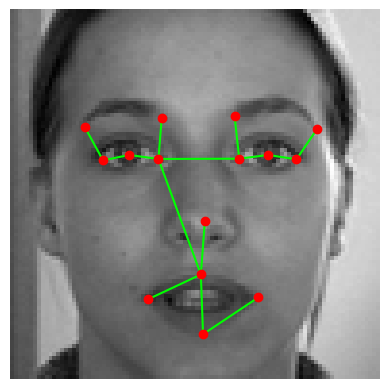

In [2]:
# load data
# keypoints, images = processFacesData("training.csv")
keypoints, images = readFacesData("training.csv")
numImages = images.shape[0]
print("Number of images: ", numImages)
numTrain = int(numImages * 0.7)
numTest = numImages - numTrain
print("Number of training images: ", numTrain)
print("Number of test images: ", numTest)
numPoints = 15

trainImages = images[:numTrain]
testImages = images[numTrain:]
trainKeypoints = keypoints[:numTrain]
testKeypoints = keypoints[numTrain:]
edges = calculateEdges(trainKeypoints)

imNum = 12
visualizeFaceGraph(keypoints[imNum], images[imNum], edges)

In [3]:
# train
time1 = time.time()
t = FaceTree(edges, 13)
t.train(trainImages, trainKeypoints)
time2 = time.time()
print("Training time: ", time2 - time1)

Training time:  71.84172344207764


In [4]:
time1 = time.time()
error = t.evaluate(testImages, testKeypoints)
time2 = time.time()
print("Accuracy: ", error)
print("Evaluation time: ", time2 - time1)
print("Evaluation time per image: ", (time2 - time1) / numTest)
# save accuracies with numpy
np.save("errors.npy", error)


Evaluating on 642 images


 31%|███       | 196/642 [10:23<23:40,  3.19s/it]e:\uci\project-274b\tree.py:66: RuntimeWarning: invalid value encountered in divide
  return response / np.sqrt(np.sum(np.square(response), axis=2)).reshape(im.shape[0],im.shape[1],1)
100%|██████████| 642/642 [33:49<00:00,  3.16s/it]

Accuracy:  [array([[ 2.30093617,  6.11778723],
       [ 3.50331915,  5.9666383 ],
       [ 1.44204255, 11.04953191],
       [ 0.9266383 ,  0.67097872],
       [ 2.81634043,  1.37838298],
       [ 2.30093617, 11.92885106],
       [ 0.656     , 16.88953191],
       [-1.92034043,  1.11353191],
       [-3.85906383,  1.42808511],
       [-1.57685106, 10.62740426],
       [11.84953191,  1.52680851],
       [-2.01361702,  2.24      ],
       [ 2.50144681,  3.21838298],
       [ 0.90621277,  2.04221277],
       [-1.39948936,  2.55761702]]), array([[ 10.42723404,  -7.46008511],
       [ 10.08544681,   6.98961702],
       [  9.91455319,  -3.42842553],
       [  9.06008511, -15.42229787],
       [  9.74365957,   2.27438298],
       [  8.54740426,  13.24289362],
       [ -1.81344681,  -1.1053617 ],
       [ 14.35744681, -13.57412766],
       [ -1.98434043,   0.80578723],
       [ 13.33208511,  13.78723404],
       [ -0.40204255,  -0.32068085],
       [  1.41412766,  -3.11829787],
       [ -0.46570

In [12]:
import pandas as pd
errors = np.stack(error)
print(errors.max())
print(errors.shape)
print(np.linalg.norm(errors, axis=2).shape)
errors = np.mean(np.linalg.norm(errors, axis=2), axis=0)
print("Mean error: ", errors)
print("Mean error: ", np.mean(errors))
keys = pd.read_csv("training.csv").keys()
for i in range(15):
    # print with 3 digits
    print(keys[i * 2], ":", "{:.3f}".format(errors[i]))

82.926477604
(642, 15, 2)
(642, 15)
Mean error:  [19.14604012 18.40886744 18.5167061  19.72480302 18.05418399 18.64663434
 18.71661755 20.35206486 18.15988787 19.7867627  15.84346238 13.99424892
 14.29734172 15.37299374 15.59818783]
Mean error:  17.64125350551584
left_eye_center_x : 19.146
right_eye_center_x : 18.409
left_eye_inner_corner_x : 18.517
left_eye_outer_corner_x : 19.725
right_eye_inner_corner_x : 18.054
right_eye_outer_corner_x : 18.647
left_eyebrow_inner_end_x : 18.717
left_eyebrow_outer_end_x : 20.352
right_eyebrow_inner_end_x : 18.160
right_eyebrow_outer_end_x : 19.787
nose_tip_x : 15.843
mouth_left_corner_x : 13.994
mouth_right_corner_x : 14.297
mouth_center_top_lip_x : 15.373
mouth_center_bottom_lip_x : 15.598


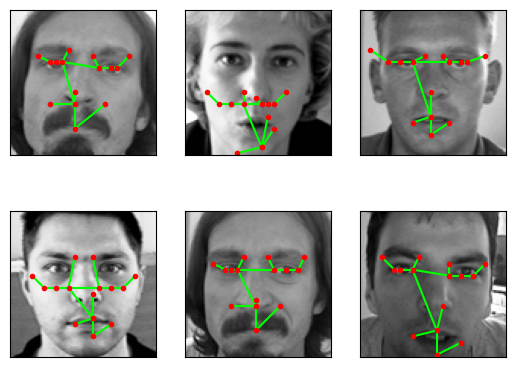

In [4]:
# predict on training images and visualize in 2 * 3 grid
locations = []
for i in range(6):
    im = trainImages[i]
    locations.append(t.predict(im))
images = trainImages[:6]
locations = np.stack(locations)
visualizeFaceGraphs(locations, images, edges)

(6, 15, 2)
Mean error:  [ 1.37957714  1.77929697  1.76636963  1.53364875  6.00626383 16.79139678]


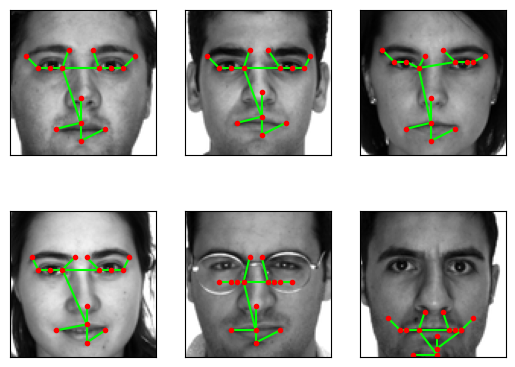

In [11]:
# predict on test images and visualize in 2 * 3 grid
choose = [7, 10, 13, 15, 1, 2]
locations = []
for i in [7, 10, 13, 15, 1, 2]:
    im = testImages[i]
    locations.append(t.predict(im))
images = testImages[[7, 10, 13, 15, 1, 2]]
locations = np.stack(locations)
keypoints = testKeypoints[[7, 10, 13, 15, 1, 2]]
diff = np.abs(locations - keypoints)
print(diff.shape)
diff = np.mean(diff, axis=(1, 2))
print("Mean error: ", diff)
visualizeFaceGraphs(locations, images, edges)